In [63]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [64]:
def import_drive_file(link, sep):
    """ Cria processo de importação de datasets do Drive para um Data Frame no Colab"""
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    fluff, id = link.split('=')
    print (id) # Verify that you have everything after '='

    downloaded = drive.CreateFile({'id':id}) 
    downloaded.GetContentFile('Filename.csv')  
    df = pd.read_csv('Filename.csv', sep=sep)
    return df

# Lista 2 - Exercícios

__1)__ Utilizando o _dataset_ para a classificação de casas em Paris, com as seguintes características dos dados:

- squareMeters - quantidade de metros quadrados;
- numberOfRooms - quantidade de quartos;
- hasYard - se têm ou não quintal;
- hasPool - se tem ou não piscina;
- floors - número de andares;
- cityCode - CEP;
- cityPartRange - quanto maior o valor mais exclusivo é a vizinhança;
- numPrevOwners - quantidade de donos anteriores;
- made - ano da fabricação;
- isNewBuilt - se é um imóvel novo;
- hasStormProtector - se têm proteção contra chuva;
- basement - tamanho do porão;
- attic - tamanho do sotão;
- garage - tamanho da garagem;
- hasStorageRoom - se têm ou não despensa;
- hasGuestRoom - número de quartos de hóspedes;
- price - preço da casa;
- category - marcação se a casa é luxuosa `Luxury` ou uma casa básica `Basic`.

A partir da descrição dos dados desenvolva os tópicos a seguir:

__A)__ Faça uma EDA para conhecer as características dos dados (façam gráficos, análise de correlações e etc.)

__B)__ Faça um modelo de Regressão onde a variável resposta será o preço dos imóveis. Teste os diferentes modelos vistos durante o curso. Avalie a importância dos atributos, se a variável `price` influência na resposta final do modelo e o quanto que impacta.

## 

__2)__ Utilizando o _dataset_ para a classificação de casas em Paris, com as seguintes características dos dados:

- squareMeters - quantidade de metros quadrados;
- numberOfRooms - quantidade de quartos;
- hasYard - se têm ou não quintal;
- hasPool - se tem ou não piscina;
- floors - número de andares;
- cityCode - CEP;
- cityPartRange - quanto maior o valor mais exclusivo é a vizinhança;
- numPrevOwners - quantidade de donos anteriores;
- made - ano da fabricação;
- isNewBuilt - se é um imóvel novo;
- hasStormProtector - se têm proteção contra chuva;
- basement - tamanho do porão;
- attic - tamanho do sotão;
- garage - tamanho da garagem;
- hasStorageRoom - se têm ou não despensa;
- hasGuestRoom - número de quartos de hóspedes;
- price - preço da casa;
- category - marcação se a casa é luxuosa `Luxury` ou uma casa básica `Basic`.

A partir da descrição dos dados desenvolva os tópicos a seguir:

__A)__ Faça uma EDA para conhecer as características dos dados (façam gráficos, análise de correlações e etc.)

__B)__ Avalie inicialmente as variáveis categóricas utilizando o Qui-Quadrado e o ANOVa. Busque entender se todas as variáveis categóricas são relevantes para a variável `category`. Desenvolva uma modelo de Regressão Logística e avalie o resultado do modelo e o impacto da variável `price` no desempenho do modelo.

In [65]:
#2 A)
# Importando os dados
df_paris = import_drive_file(link='https://drive.google.com/open?id=1Urnw5gNTqOM44H-G-c-hl1l_RGsoayXd', sep=",")

1Urnw5gNTqOM44H-G-c-hl1l_RGsoayXd


In [66]:
df_paris.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Luxury
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [67]:
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [68]:
col_num = [var for var in df_paris.columns if df_paris[var].dtype == 'float64' or df_paris[var].dtype == 'int64']
col_num

['squareMeters',
 'numberOfRooms',
 'hasYard',
 'hasPool',
 'floors',
 'cityCode',
 'cityPartRange',
 'numPrevOwners',
 'made',
 'isNewBuilt',
 'hasStormProtector',
 'basement',
 'attic',
 'garage',
 'hasStorageRoom',
 'hasGuestRoom',
 'price']

In [69]:
df_paris.shape

(10000, 18)

In [70]:
# As classes são desbalanceadas
df_paris["category"].value_counts(normalize=True)

Basic     0.747
Luxury    0.253
Name: category, dtype: float64

In [71]:
# Verifica valores duplicados
df_paris.duplicated().value_counts()

False    10000
dtype: int64

In [72]:
# Verifica se temos valores nulos
df_paris.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [73]:
df_paris.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

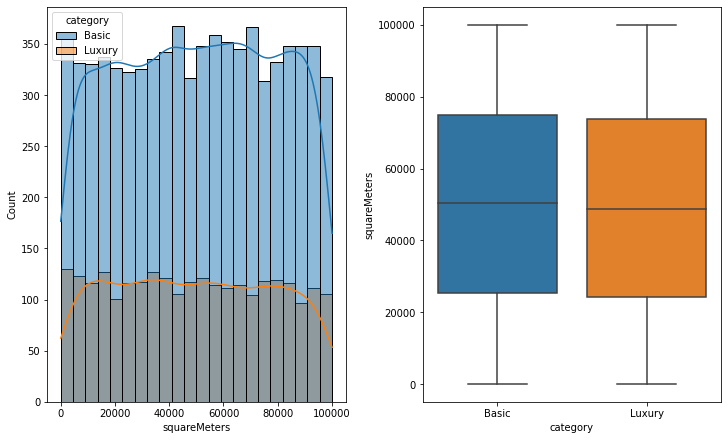

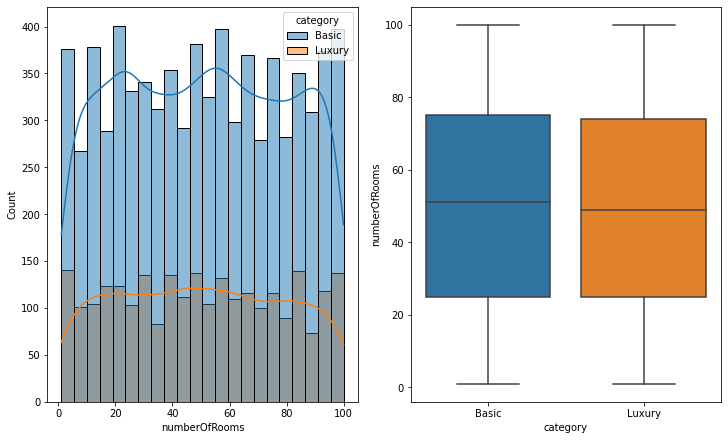

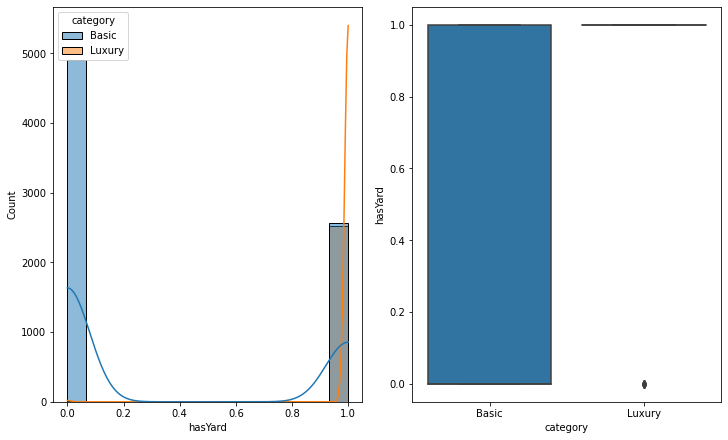

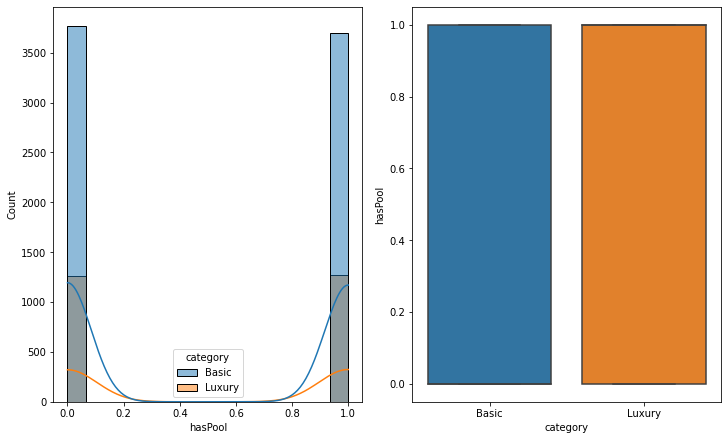

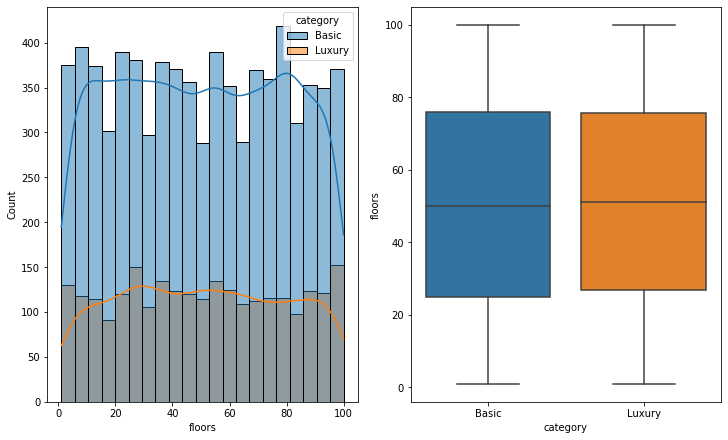

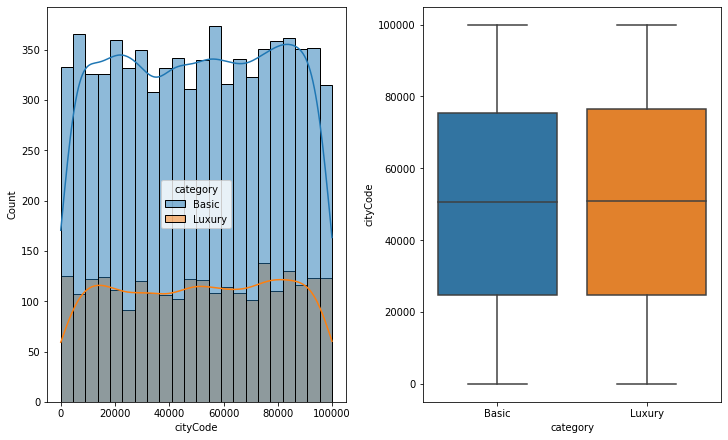

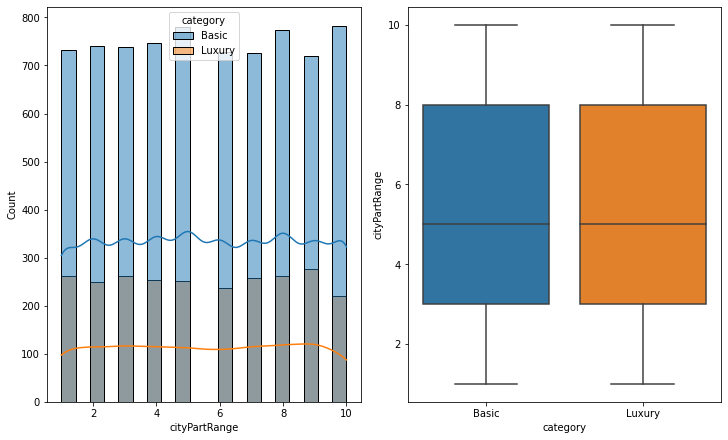

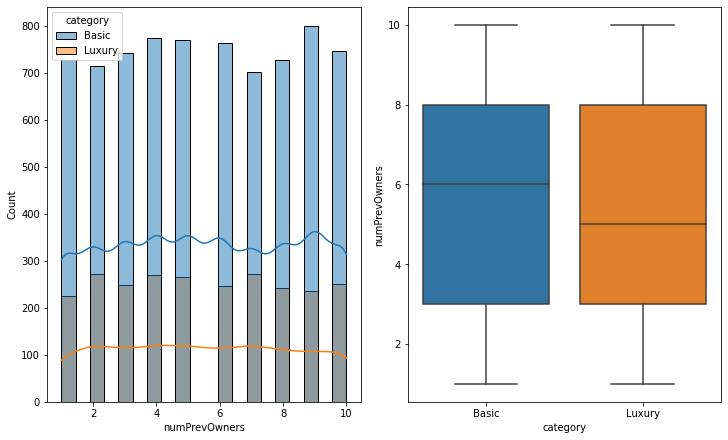

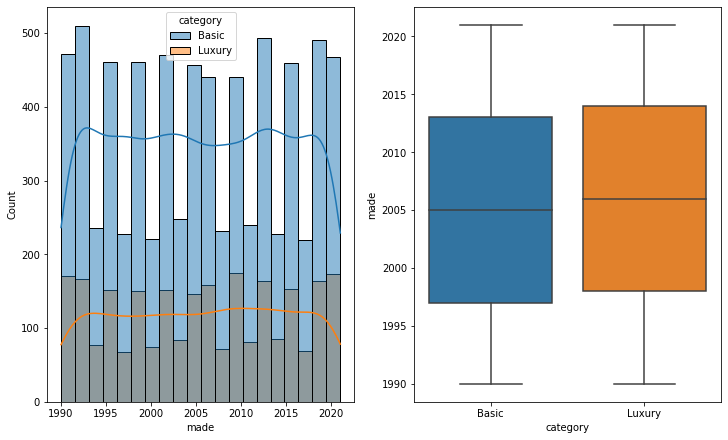

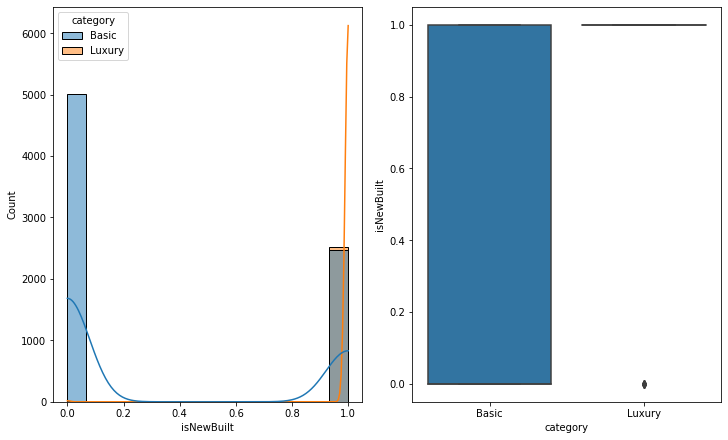

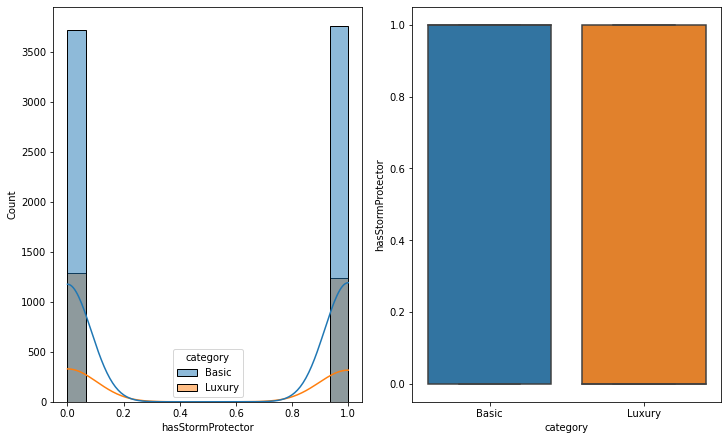

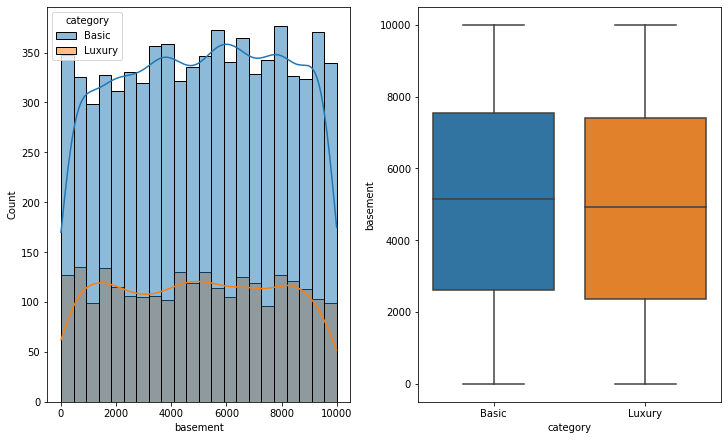

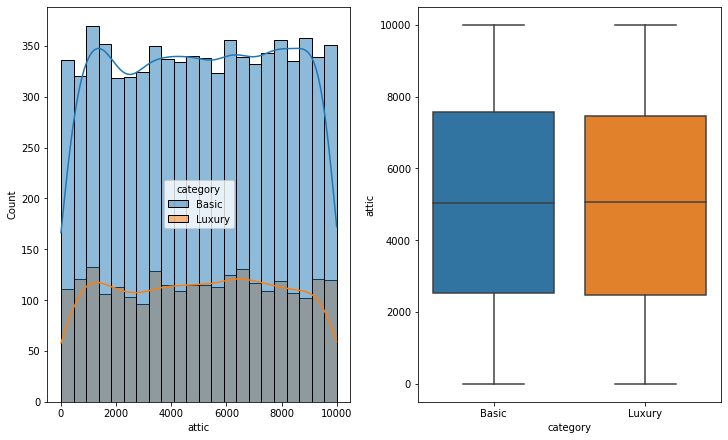

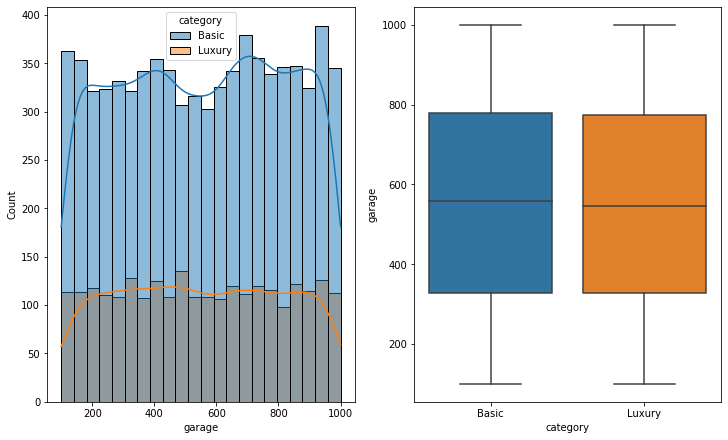

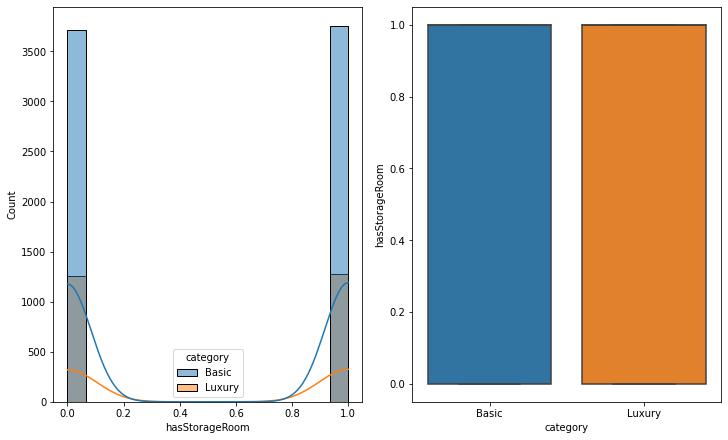

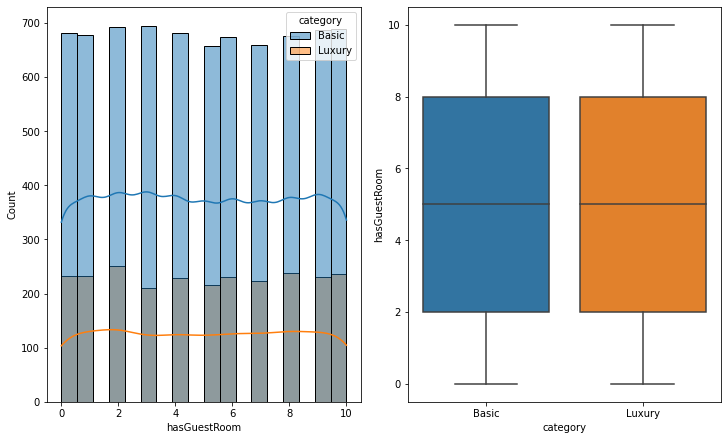

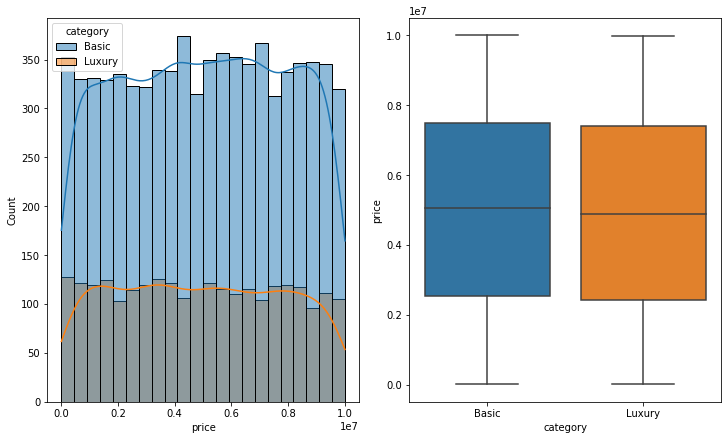

In [74]:
for i, col in enumerate(df_paris.columns):
  if col != "category":
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), constrained_layout=True)

    sns.histplot(data=df_paris, x = col, kde=True, hue="category", ax=ax1)
    sns.boxplot(data=df_paris, x= 'category', y = col, ax=ax2)
    plt.show()

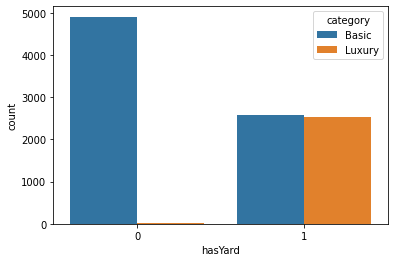

In [75]:
sns.countplot(data=df_paris, x = "hasYard", hue="category")
plt.show()

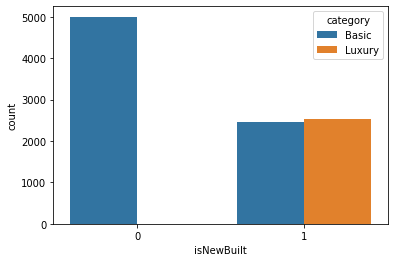

In [76]:
sns.countplot(data=df_paris, x = "isNewBuilt", hue="category")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


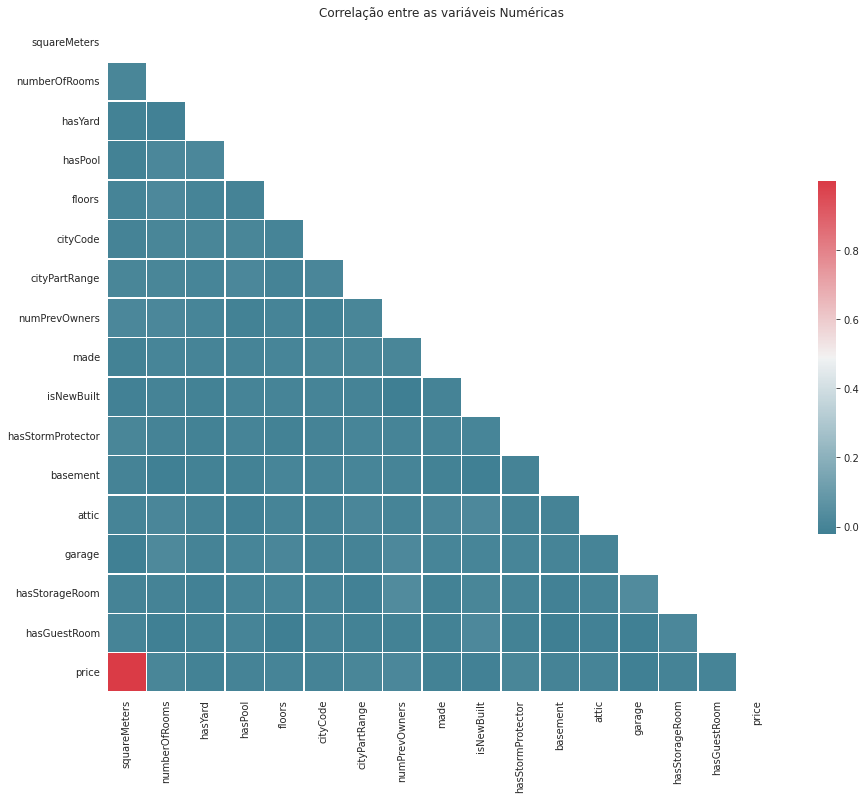

In [77]:
# Correlação entre variáveis
# É possível observar que preço e metros quadrados são correlacionados. Vou retirar a variável preço por ela ter uma relação muito forte com a variável categórica e por ser o tipo de feature que nem sempre é possível obter de antemão.

def plt_correlacao_entre_vars_num(df, col_num, method="spearman"):
    """ Cria gráfico de correlação entre as variáveis"""
    corr=df[col_num].corr(method=method)

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap = True)

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(15, 13))
        ax = sns.heatmap(corr, mask=mask, cmap = cmap, square=True, #annot = True, 
                        linewidths = .5, cbar_kws = {"shrink": .5})
        plt.title('Correlação entre as variáveis Numéricas')

plt_correlacao_entre_vars_num(df=df_paris, col_num=col_num, method="spearman")

In [78]:
df_paris.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Luxury
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [79]:
# Carrega a função do Qui Quadrado
from sklearn.feature_selection import chi2

# Aplicando o teste Qui quadrado
chi_scores = chi2(df_paris[["hasYard", "hasPool", "isNewBuilt", "hasStormProtector", "hasStorageRoom"]], # Todas as variáveis categóricas
                  df_paris["category"]) # Variável resposta 

chi_scores                  

(array([1.58387067e+03, 1.82664698e-01, 1.68384972e+03, 6.48217657e-01,
        1.76831082e-04]),
 array([0.        , 0.66909317, 0.        , 0.42075064, 0.98939022]))

In [80]:
# Usando o SelectKBest para selecionar as 2 principais variáveis com mais relação com a variável resposta pelo chi2
from sklearn.feature_selection import SelectKBest

chi2_selector = SelectKBest(chi2, k=2)
chi2_selector.fit(df_paris[["hasYard", "hasPool", "isNewBuilt", "hasStormProtector", "hasStorageRoom", "hasGuestRoom"]], df_paris["category"])

# Look at scores returned from the selector for each feature
chi2_scores = pd.DataFrame(list(zip(df_paris[["hasYard", "hasPool", "isNewBuilt", "hasStormProtector", "hasStorageRoom", "hasGuestRoom"]].columns, chi2_selector.scores_, chi2_selector.pvalues_)), columns=['ftr', 'score', 'pval'])
chi2_scores

# you can see that the kbest returned from SelectKBest 
#+ were the two features with the _highest_ score
kbest = np.asarray(df_paris[["hasYard", "hasPool", "isNewBuilt", "hasStormProtector", "hasStorageRoom", "hasGuestRoom" ]].columns)[chi2_selector.get_support()]
kbest

array(['hasYard', 'isNewBuilt'], dtype=object)

In [81]:
kbest

array(['hasYard', 'isNewBuilt'], dtype=object)

In [82]:
# ANOVA
from sklearn.feature_selection import f_classif

# Aplicando o teste Qui quadrado
F_scores = f_classif(df_paris[["hasYard", "hasPool", "isNewBuilt", "hasStormProtector", "hasStorageRoom", "hasGuestRoom"]], # Todas as variáveis categóricas
                  df_paris["category"]) # Variável resposta 
F_scores

(array([4.75666078e+03, 3.62946730e-01, 5.06296799e+03, 1.29608484e+00,
        3.55725799e-04, 1.45578505e-02]),
 array([0.        , 0.5468879 , 0.        , 0.25495689, 0.98495261,
        0.903966  ]))

In [83]:
# Usando o SelectKBest para selecionar as 2 principais variáveis com mais relação com a variável resposta pela ANOVA
f_classif_selector = SelectKBest(f_classif, k=2)
f_classif_selector.fit(df_paris[["hasYard", "hasPool", "isNewBuilt", "hasStormProtector", "hasStorageRoom", "hasGuestRoom"]], df_paris["category"])

# Look at scores returned from the selector for each feature
f_classif_scores = pd.DataFrame(list(zip(df_paris[["hasYard", "hasPool", "isNewBuilt", "hasStormProtector", "hasStorageRoom", "hasGuestRoom"]].columns, f_classif_selector.scores_, f_classif_selector.pvalues_)), columns=['ftr', 'score', 'pval'])
f_classif_scores

# you can see that the kbest returned from SelectKBest 
#+ were the two features with the _highest_ score
f_classif_kbest = np.asarray(df_paris[["hasYard", "hasPool", "isNewBuilt", "hasStormProtector", "hasStorageRoom", "hasGuestRoom"]].columns)[f_classif_selector.get_support()]
f_classif_kbest

array(['hasYard', 'isNewBuilt'], dtype=object)

Tanto o método chi2 quanto a ANOVA indicaram as mesmas variáveis como as mais correlacionadas com a variável category. Por isso vamos seguir apenas com as variáveis indicadas pelos algoritmos.

In [84]:
df_paris.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

In [85]:
X = ['squareMeters', 'numberOfRooms', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', #'isNewBuilt', 'hasYard',
       'basement', 'attic', 'garage']
X_all = ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom']
y = ['category']

Modelo com as variáveis selecionadas

In [86]:
# Separando os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_paris[X],
                                                    df_paris[y],
                                                    test_size = 0.3,
                                                    random_state = 42)

In [87]:
# Normalizando dados (Depois de testados, o StandarScaler funcionou melhor)
scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [88]:
model = LogisticRegression(random_state=42, penalty="none")#"none")
# Fit do Modelo
model.fit(X_train_std, y_train)

# Predict do Modelo
y_pred = model.predict(X_test_std)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
cm = confusion_matrix(y_test, y_pred)

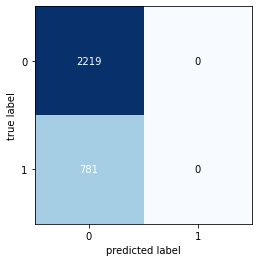

In [90]:
plot_confusion_matrix(cm)
plt.show()

In [91]:
# Métricas para a base de TESTE
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Basic       0.74      1.00      0.85      2219
      Luxury       0.00      0.00      0.00       781

    accuracy                           0.74      3000
   macro avg       0.37      0.50      0.43      3000
weighted avg       0.55      0.74      0.63      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
# Métricas para a base de TREINO
print(classification_report(y_train, model.predict(X_train_std)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Basic       0.75      1.00      0.86      5251
      Luxury       0.00      0.00      0.00      1749

    accuracy                           0.75      7000
   macro avg       0.38      0.50      0.43      7000
weighted avg       0.56      0.75      0.64      7000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",model.coef_.transpose())
coef_table = coef_table.sort_values(by = ['Coefs'], ascending = False)
coef_table

# Observando as o coeficiente das variáveis na regressão, é possível observar que as variáveis isNewBuilt e hasYard impacatm muito para predizer a classe Luxury. 

,0,Coefs
2,floors,0.038665
4,cityPartRange,0.023112
6,made,0.016268
3,cityCode,0.009192
9,garage,-0.004483
1,numberOfRooms,-0.010057
0,squareMeters,-0.012115
8,attic,-0.029145
7,basement,-0.043082
5,numPrevOwners,-0.047166


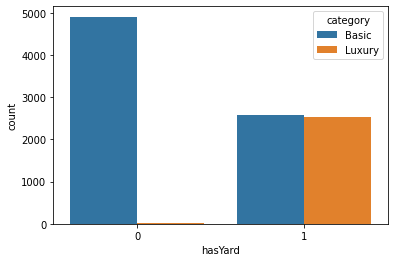

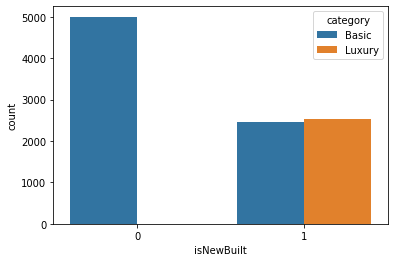

In [94]:
# Quando observamos a distribuição das variáveis entre as classes, fica claro que temos um viés forte, pois não temos nenhum registro de imóvel Luxury que não tenham Yard e que não seja novo, como pode ser visto abaixo.
sns.countplot(data=df_paris, x = "hasYard", hue="category")
plt.show()

sns.countplot(data=df_paris, x = "isNewBuilt", hue="category")
plt.show()

In [95]:
# Vamos testar o modelo agora sem essas duas variáveis mais importantes para entender o quanto elas são importantes . 
X_select = ['squareMeters', 'numberOfRooms', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', #'isNewBuilt', 'hasYard',
       'basement', 'attic', 'garage']

In [96]:
# Separando os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_paris[X_select],
                                                    df_paris[y],
                                                    test_size = 0.3,
                                                    random_state = 42)

In [97]:
# Normalizando dados (Depois de testados, o StandarScaler funcionou melhor)
scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [98]:
model = LogisticRegression(random_state=42, penalty="none")#"none")
# Fit do Modelo
model.fit(X_train_std, y_train)

# Predict do Modelo
y_pred = model.predict(X_test_std)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [99]:
cm = confusion_matrix(y_test, y_pred)

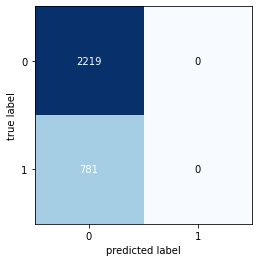

In [100]:
plot_confusion_matrix(cm)
plt.show()

In [101]:
# Métricas para a base de TESTE
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Basic       0.74      1.00      0.85      2219
      Luxury       0.00      0.00      0.00       781

    accuracy                           0.74      3000
   macro avg       0.37      0.50      0.43      3000
weighted avg       0.55      0.74      0.63      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
# Métricas para a base de TREINO
print(classification_report(y_train, model.predict(X_train_std)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Basic       0.75      1.00      0.86      5251
      Luxury       0.00      0.00      0.00      1749

    accuracy                           0.75      7000
   macro avg       0.38      0.50      0.43      7000
weighted avg       0.56      0.75      0.64      7000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",model.coef_.transpose())
coef_table = coef_table.sort_values(by = ['Coefs'], ascending = False)
coef_table

# Observando as o coeficiente das variáveis restantes (escolhidas), é possível observar que não temos variáveis muito impactantes que ajudem a separar bem as classes.
# Por isso o modelo tem um resultado tão ruim para a classe Luxury

,0,Coefs
2,floors,0.038665
4,cityPartRange,0.023112
6,made,0.016268
3,cityCode,0.009192
9,garage,-0.004483
1,numberOfRooms,-0.010057
0,squareMeters,-0.012115
8,attic,-0.029145
7,basement,-0.043082
5,numPrevOwners,-0.047166


Modelo com todas as variáveis, exceto a price

In [104]:
# Separando os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_paris[X_all],
                                                    df_paris[y],
                                                    test_size = 0.3,
                                                    random_state = 42)

In [105]:
# Normalizando dados (Depois de testados, o StandarScaler funcionou melhor)
scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [106]:
model = LogisticRegression(random_state=42, penalty="none")#"none")
# Fit do Modelo
model.fit(X_train_std, y_train)

# Predict do Modelo
y_pred = model.predict(X_test_std)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
cm = confusion_matrix(y_test, y_pred)

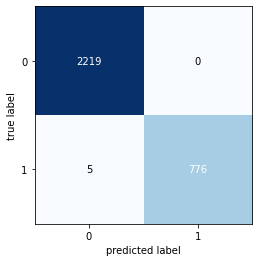

In [108]:
plot_confusion_matrix(cm)
plt.show()

In [109]:
# Métricas para a base de TESTE
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      2219
      Luxury       1.00      0.99      1.00       781

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [110]:
# Métricas para a base de TREINO
print(classification_report(y_train, model.predict(X_train_std)))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      5251
      Luxury       1.00      1.00      1.00      1749

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [111]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",model.coef_.transpose())
coef_table = coef_table.sort_values(by = ['Coefs'], ascending = False)
coef_table

,0,Coefs
9,isNewBuilt,7.625504
2,hasYard,7.371527
6,cityPartRange,0.722612
1,numberOfRooms,0.436123
4,floors,0.434572
10,hasStormProtector,0.341322
12,attic,0.083457
13,garage,-0.016508
15,hasGuestRoom,-0.023469
5,cityCode,-0.065399


#### Conclusões

- Os testes ANOVA e chi2 ajudaram a selecionar as principais variáveis. Ambos os métodos indicaram as mesmas variáveis.
- Por uma questão dos dados utilizados, tanto com as colunas selecionadas quanto com todas as variáveis possíveis, o modelo vai muito bem (talvez até overfittando), com métricas muito próximas de 100%.
- Quando retiramos as duas variáveis mais importantes (isNewBuilt e hasYard), o modelo vai muita mau, pois as demais variáveis não ajudam a separar bem as classes. 
- Seria legal testar alguns métodos de balancemanto entre as classes e talvez conseguir mais dados para termos um modelo mais robusto e confiável. Além disso, checar para ver se existe algum viés na captação dos dados das variáveis isNewBuilt e hasYard 

## 

__3)__ A partir do _dataset_ sobre caranguejos, utilize um modelo de regressão para predizer a idade dos caranguejos. Faça uma EDA para conhecer os dados, desenvolva os modelos de Regressão apresentados em aula e faça uma análise da importância das variáveis.

## 

__4)__ Utilizando o _dataset_ sobre o câncer de mama `breast_cancer.csv`, resolva os itens abaixo:

__A)__ Realize uma análise exploratória dos dados para conhecer melhor o dataset;

__B)__ Utilizando o raio médio como variável resposta, desenvolva uma Regressão Linear para fazer a predição. Teste diferentes modelos que foram vistos em aula. Faz sentido um modelo de predição desta forma?

__C)__ Desenvolva um modelo de Regressão Logística para predizer se o câncer seria maligno ou benigno, utilizando a
comovariável resposta `diagnosis`